In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Importing the dataset
data = pd.read_csv('/content/collegePlace.csv')
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [3]:
# Checking the infomation of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
# checking if there is any issing values
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

We have no missing values

In [5]:
# Checking the statistical summary of the dataframe
data.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


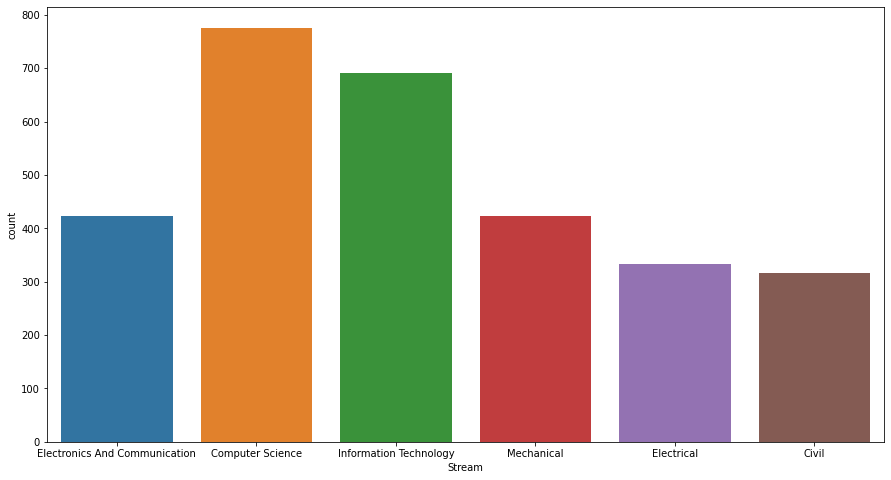

In [6]:
# plotting graph for output classes counts

plt.figure(figsize=(15,8))
sns.countplot(x = 'Stream',data = data)

The above graph shows that we have 6 classes of Enginnering Streams.

The graph showws that 'Computer science' and the highest count value while the 'Civil' has the lowest value.

I will bw applying Dummy variable encoding on the column to conver the class of values to numbers.

In [7]:
# Applyng dummy varible encoding on the Stream column
one_hot_encoded_data = pd.get_dummies(data['Stream'])

# Joinging the encoded dataframe with the actual data
data=data.join(one_hot_encoded_data)

# Dropping the encoded column
data = data.drop('Stream',axis = 1)

data.head()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,Male,1,8,1,1,1,0,0,0,1,0,0
1,21,Female,0,7,1,1,1,0,1,0,0,0,0
2,22,Female,1,6,0,0,1,0,0,0,0,1,0
3,21,Male,0,8,0,1,1,0,0,0,0,1,0
4,22,Male,0,8,1,0,1,0,0,0,0,0,1


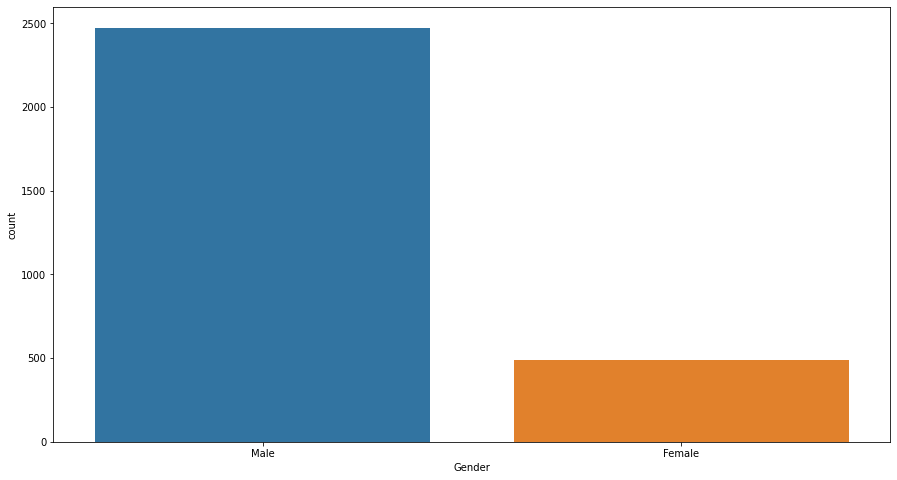

In [8]:
# plotting graph for output classes counts

plt.figure(figsize=(15,8))
sns.countplot(x = 'Gender',data = data)

The graph above shows that the gender column has two classes of gender, Male and Female.

The Male class has a lager value count compares to that of the female count.

I will be applying label encoding on the column to replace the male and female with 1 and 0 respectively

In [9]:
# Label encoding the Gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

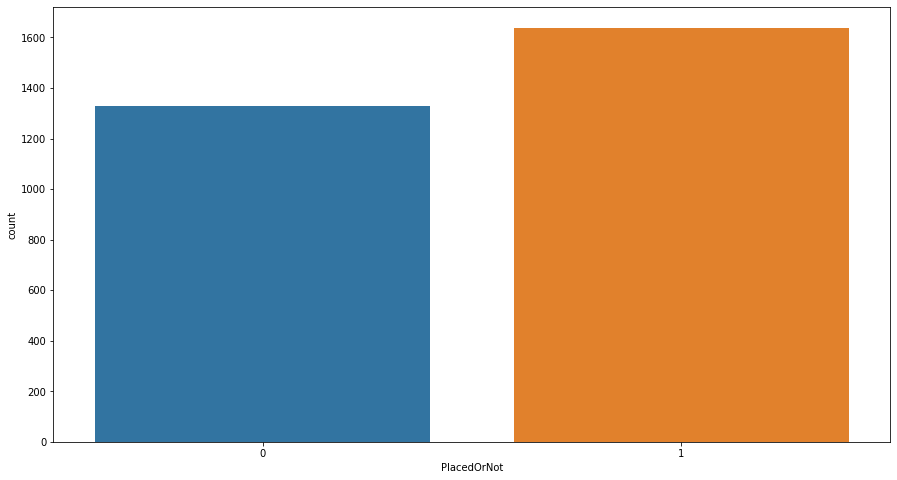

In [10]:
# plotting graph for Placed or Not classes counts

plt.figure(figsize=(15,8))
sns.countplot(x = 'PlacedOrNot',data = data)

The graph above shows that the placed '1' has the highest number of count while the Not '0' has a bit lower count values.

The dataset is imbalnace but almost balance, I can decide to oversample or undersample the dataset to have a balance dataset.

My decision will be made from the result of the performance metrics on the pridiction of the model I will be building with the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f712185cb90>,
      dtype=object)

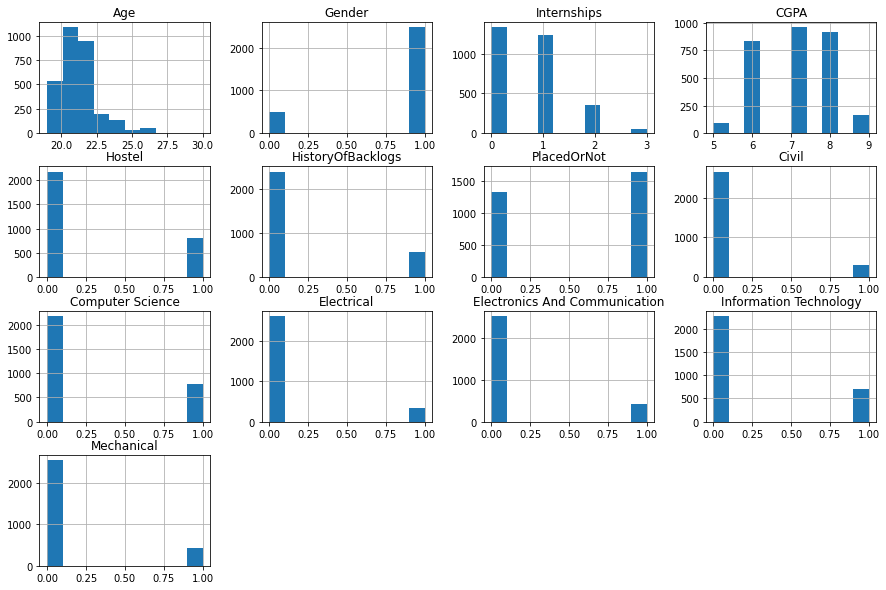

In [11]:
# plotting variation graphs for each property

data.hist(figsize = (15,10))

In [12]:
data.head()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,1,1,8,1,1,1,0,0,0,1,0,0
1,21,0,0,7,1,1,1,0,1,0,0,0,0
2,22,0,1,6,0,0,1,0,0,0,0,1,0
3,21,1,0,8,0,1,1,0,0,0,0,1,0
4,22,1,0,8,1,0,1,0,0,0,0,0,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            2966 non-null   int64
 1   Gender                         2966 non-null   int64
 2   Internships                    2966 non-null   int64
 3   CGPA                           2966 non-null   int64
 4   Hostel                         2966 non-null   int64
 5   HistoryOfBacklogs              2966 non-null   int64
 6   PlacedOrNot                    2966 non-null   int64
 7   Civil                          2966 non-null   uint8
 8   Computer Science               2966 non-null   uint8
 9   Electrical                     2966 non-null   uint8
 10  Electronics And Communication  2966 non-null   uint8
 11  Information Technology         2966 non-null   uint8
 12  Mechanical                     2966 non-null   uint8
dtypes: int64(7), uint8

In [14]:
# Checking the statisctical summary of the data
data.describe()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.834457,0.703641,7.073837,0.269049,0.192178,0.552596,0.106878,0.261632,0.112610,0.142953,0.232974,0.142953
std,1.324933,0.371732,0.740197,0.967748,0.443540,0.394079,0.497310,0.309010,0.439597,0.316168,0.350084,0.422797,0.350084
min,19.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,1.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,1.000000,1.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1.000000,3.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Checking the correlation of the dataset
data.corr()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
Age,1.000000,-0.021538,0.006552,-0.119787,0.003042,-0.042586,0.046943,-0.011542,0.033000,-0.050135,-0.023265,0.022448,0.010183
Gender,-0.021538,1.000000,-0.081526,-0.003512,-0.200254,0.026153,-0.006705,0.068931,-0.060965,0.015184,-0.017649,-0.050665,0.080833
Internships,0.006552,-0.081526,1.000000,0.023496,0.004617,-0.015118,0.179334,-0.073807,0.134719,-0.046140,0.009965,0.024554,-0.101967
CGPA,-0.119787,-0.003512,0.023496,1.000000,0.014991,0.002576,0.588648,0.007437,-0.020848,0.002578,0.021596,-0.000018,-0.004287
Hostel,0.003042,-0.200254,0.004617,0.014991,1.000000,0.103506,-0.038182,-0.015475,-0.087841,-0.117517,-0.123974,-0.185089,0.577598
HistoryOfBacklogs,-0.042586,0.026153,-0.015118,0.002576,0.103506,1.000000,-0.022337,-0.024706,-0.029456,0.048217,0.067269,-0.046142,0.003707
PlacedOrNot,0.046943,-0.006705,0.179334,0.588648,-0.038182,-0.022337,1.000000,-0.064026,0.035769,-0.007651,0.032350,0.043560,-0.066448
Civil,-0.011542,0.068931,-0.073807,0.007437,-0.015475,-0.024706,-0.064026,1.000000,-0.205919,-0.123231,-0.141281,-0.190650,-0.141281
Computer Science,0.033000,-0.060965,0.134719,-0.020848,-0.087841,-0.029456,0.035769,-0.205919,1.000000,-0.212050,-0.243111,-0.328063,-0.243111
Electrical,-0.050135,0.015184,-0.046140,0.002578,-0.117517,0.048217,-0.007651,-0.123231,-0.212050,1.000000,-0.145487,-0.196326,-0.145487


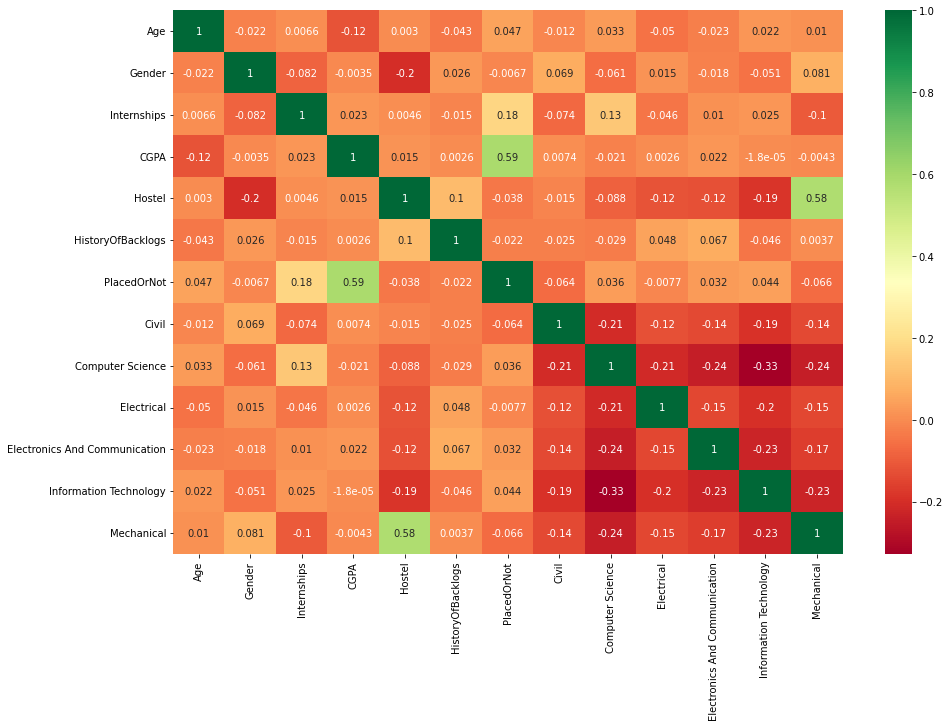

In [16]:
# Plotting the correlation heatmap
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
# Rearranging the head of the dataframe
data = data[['Age', 'Gender',
             'Electronics And Communication',
             'Computer Science', 'Information Technology',
             'Mechanical', 'Electrical', "Civil",
             "Internships","CGPA",'Hostel',
             'HistoryOfBacklogs', 'PlacedOrNot']]

data.head()

,Age,Gender,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Civil,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,1,0,0,0,0,0,1,8,1,1,1
1,21,0,0,1,0,0,0,0,0,7,1,1,1
2,22,0,0,0,1,0,0,0,1,6,0,0,1
3,21,1,0,0,1,0,0,0,0,8,0,1,1
4,22,1,0,0,0,1,0,0,0,8,1,0,1


In [18]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [19]:
# Splitting data set into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2224, 12), (2224,), (742, 12), (742,))

In [21]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Predicting the Test set results
y_pred = logreg.predict(X_test)

In [24]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       316
           1       0.80      0.77      0.78       426

    accuracy                           0.76       742
   macro avg       0.75      0.75      0.75       742
weighted avg       0.76      0.76      0.76       742



# KNN

In [25]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [26]:
# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)

In [27]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82       316
           1       0.94      0.75      0.83       426

    accuracy                           0.83       742
   macro avg       0.84      0.84      0.83       742
weighted avg       0.85      0.83      0.83       742



# SVM

In [28]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [29]:
# Predicting the Test set results
y_pred = svc_classifier.predict(X_test)

In [30]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       316
           1       0.84      0.77      0.80       426

    accuracy                           0.78       742
   macro avg       0.78      0.78      0.78       742
weighted avg       0.79      0.78      0.78       742



# Randome Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=10)
rf_classifier = rf_classifier.fit(X_train, y_train)

In [32]:
# Prediction
y_pred = rf_classifier.predict(X_test)

In [33]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       316
           1       0.93      0.85      0.89       426

    accuracy                           0.88       742
   macro avg       0.87      0.88      0.87       742
weighted avg       0.88      0.88      0.88       742

